# Teil c - Merkmalstandardisierung

# Verbesserung durch Merkmalstandardisierung

## Methode der Standardisierung und Auswirkung auf die Algorithmen

Viele Lernalgorithmen machen es erforderlich die Merkmale zu standardisieren um eine optimale Leistung zu erzielen. Die Algorithmen Perzeptron und Adaline gehören zu den vielen Algorithmen, die von einer Standardisierung profitieren.

Im folgenden wird die Methode <i>Standardisierung</i> erläutert. Diese verleiht den Daten die Eigenschaften einer Standardnormalverteilung. Der Mittelwert jedes Merkmals beträgt 0, die Standardabweichung jeder Spalte beträgt 1. Um zum Beispiel das Merkmal j zu standardiesieren, wird der Mittelwert $\mu$ der jeweiligen Stichprobe abgezogen und das Ergebnis durch die Standardabweichung $\sigma$ dividiert. Das Standardisierungsverfahren wird auf alle Merkmale der Datenmenge angewendet.

$x_j^{\prime(i)} = \frac{x_j^{(i)} - \mu_j}{\sigma_j}$. 

Die Standardisierung verbessert die Algorithmen, weil zum Auffinden einer guten/ optimalen Lösung (das globale Minimum der Straffunktion) weniger Schritte erforderlich sind. Folgende Abbildung stellen die Strafflächen einer zweidimensionalen Klassifizierungsaufgabe als Funktion der Gewichtungen dar.

<img src="./Figures/Merkmalstandardisierung.png" alt="drawing" style="width:500px;"/>


## Implementierung

Selektieren Sie exakt dieselben Daten des Iris-Datensatzes aus Teil a und nehmen Sie die Standardisierung vor. <br>

Trainineren Sie den entweder den Perzeptron-Algorithmus oder den Adaline-Algorithmus aus Teil a mit den standardisierten Daten mit verschiedenen Parametern. <br>

Vergleichen Sie die Ergebnisse zwischen den standardisierten Daten und den nicht-standardisierten Daten. Stellen Sie die verschiedenen Resultate dar.<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("./Data/iris.data", header=None, sep=",")

In [2]:
class Adaline(object):
    
    def __init__(self, eta=None, epochs=None):
        self.eta = eta
        self.epochs = epochs
        
    def gewichtete_summe(self, X):
        return X.dot(self.w[1:]) + self.w[0] 
    
    def activation(self, X):
        return X 
    
    def fit(self, X, y):
        
        #Initialisieren der Gewichte. Anstatt 3 wäre auch (X.shape[1] + 1) möglich 
        weights = np.random.normal(0.0, 0.01, 3)
        weights[0] = 1 
        self.w = weights
        cost = []

        for epoch in range(self.epochs):
            
            gewichtete_summe = self.gewichtete_summe(X)
            pred_output = self.activation(gewichtete_summe)
            errors = y - pred_output
            self.w[0] += self.eta * sum(errors)
            self.w[1:] += self.eta * X.T.dot(errors)

            cost_epoch = (errors**2).sum() / 2.0
            cost.append(cost_epoch)
            
        return cost

## Auswahl der Daten

In [3]:
# Auswahl von setosa und versicolor
values = ['Iris-setosa', 'Iris-versicolor']
filtered_df = pd.DataFrame(df[df[4].isin(values)])

y_df = filtered_df[[4]]
y_copy = y_df.copy()
y_copy[4] = y_copy[4].map( {'Iris-setosa': 1, 'Iris-versicolor': 0} ).astype(int)
X_df = filtered_df[[0,2]] # Kelch- und Bluetenblattlaenge

X = X_df.to_numpy()
y = y_copy.to_numpy()
y = np.arange(100)

## Implementierung der Standardisierung

In [4]:
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis = 0)

## Training und Visualisierung des Errors

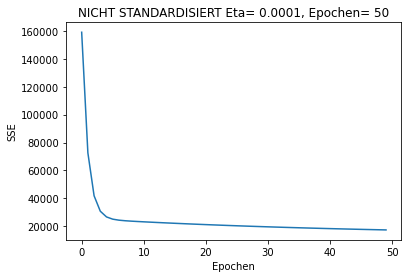

In [5]:
adaline = Adaline(0.0001, 50)
costs = adaline.fit(X, y)

plt.plot(costs)
plt.title("NICHT STANDARDISIERT Eta= 0.0001, Epochen= 50")
plt.ylabel('SSE')
plt.xlabel('Epochen')
plt.show()

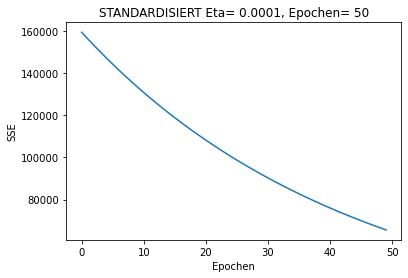

In [6]:
adaline = Adaline(0.0001, 50)
costs = adaline.fit(X_std, y)

plt.plot(costs)
plt.title("STANDARDISIERT Eta= 0.0001, Epochen= 50")
plt.ylabel('SSE')
plt.xlabel('Epochen')
plt.show()

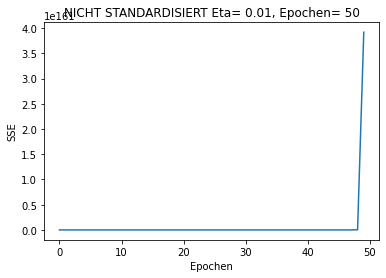

In [7]:
adaline = Adaline(0.01, 50)
costs = adaline.fit(X, y)

plt.plot(costs)
plt.title("NICHT STANDARDISIERT Eta= 0.01, Epochen= 50")
plt.ylabel('SSE')
plt.xlabel('Epochen')
plt.show()

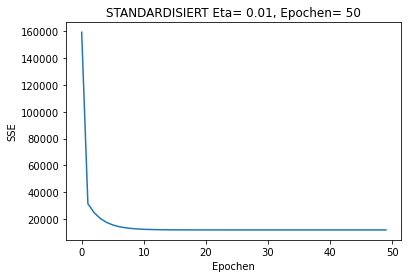

In [8]:
adaline = Adaline(0.01, 50)
costs = adaline.fit(X_std, y)

plt.plot(costs)
plt.title("STANDARDISIERT Eta= 0.01, Epochen= 50")
plt.ylabel('SSE')
plt.xlabel('Epochen')
plt.show()